In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
import random as rn


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Parámetros del modelo
input_shape = (158, 158, 3)  # Tamaño de las imágenes
num_clases = 3  # Número de clases

In [ ]:
Imagenes=[]
Etiquetas=[]
IMG_TAM = 158
DIR_BASE = '/content/drive/MyDrive/TT/Imagenes clasificadas'
DIR_ENFERMO_SR = DIR_BASE+'/Enfermo/Stem end Rot'
DIR_ENFERMO_BR = DIR_BASE+'/Enfermo/Body rot'
#DIR_ENFERMO = DIR_BASE+'/Enfermo
DIR_SANO = DIR_BASE+'/Sano'

#Data augmentation
DIR_ENFERMO_BR_brillo = DIR_BASE + '/Enfermo/Body rot/Augmented/brillo'
DIR_ENFERMO_BR_cs = DIR_BASE + '/Enfermo/Body rot/Augmented/channel_shift'
DIR_ENFERMO_BR_flip = DIR_BASE + '/Enfermo/Body rot/Augmented/flip_horizontal'
DIR_ENFERMO_BR_rotacion = DIR_BASE + '/Enfermo/Body rot/Augmented/rotacion'
DIR_ENFERMO_BR_zoom = DIR_BASE + '/Enfermo/Body rot/Augmented/zoom'

DIR_ENFERMO_SR_brillo = DIR_BASE + '/Enfermo/Stem end Rot/Augmented/brillo'
DIR_ENFERMO_SR_cs = DIR_BASE + '/Enfermo/Stem end Rot/Augmented/channel_shift'
DIR_ENFERMO_SR_flip = DIR_BASE + '/Enfermo/Stem end Rot/Augmented/flip_horizontal'
DIR_ENFERMO_SR_rotacion = DIR_BASE + '/Enfermo/Stem end Rot/Augmented/rotacion'
DIR_ENFERMO_SR_zoom = DIR_BASE + '/Enfermo/Stem end Rot/Augmented/zoom'

DIR_ENFERMO_SR_IA = DIR_BASE + '/Enfermo/Stem end Rot/AI generated'
#DIR_ENFERMO_BR_IA = DIR_BASE + '/Enfermo/Body rot/AI generated'



In [ ]:
def obtener_extension_archivos(DIR):
  ext=[]
  for archivo in os.listdir(DIR):
    nom_archivo, ext_archivo = os.path.splitext(archivo)
    ext.append(ext_archivo)
  extensiones=set(ext)
  print(extensiones)


In [ ]:
def imagen_valida(archivo,extensiones=[".jpg",".png",".JPG",".PNG",".jfif",".jpeg"]):
  nom_archivo, ext_archivo = os.path.splitext(archivo)
  es_archivo = os.path.isfile(archivo)
  es_imagen = ext_archivo.lower() in extensiones
  return es_archivo and es_imagen

In [ ]:
obtener_extension_archivos(DIR_ENFERMO_SR)
obtener_extension_archivos(DIR_ENFERMO_BR)
obtener_extension_archivos(DIR_SANO)


{'.jpg', '', '.jpeg', '.png', '.jfif', '.PNG', '.webp', '.JPG'}
{'.jpg', '', '.jpeg', '.png', '.jfif', '.PNG', '.JPG'}
{'.jpg', '', '.jpeg', '.avif', '.jfif', '.JPG'}


In [ ]:
def construir_base_datos(etiqueta, DIR):
  for archivo in tqdm(os.listdir(DIR)):
    #Construir ruta completa
    ruta = os.path.join(DIR,archivo)
    if imagen_valida(ruta):
      #Carga la imagen en RGB
      img = tf.keras.preprocessing.image.load_img(ruta,color_mode='rgb')
      #Convierte la imagen en una matriz de números
      matriz_img = tf.keras.preprocessing.image.img_to_array(img)
      #Redimenciona la imagen y normaliza la imagen [0 a 1]
      matriz_img = tf.image.resize(matriz_img/255,[IMG_TAM,IMG_TAM])
      #Agrega la matriz (array) a la lista
      Imagenes.append(matriz_img.numpy())
      #Añade la etiqueta a asociada a la imagen
      Etiquetas.append(etiqueta)


In [ ]:
clases=['Sano','Enfermo_BODYROT','Enfermo_STEMENDROT']
construir_base_datos(0, DIR_SANO)
print('\n',len(Etiquetas))
construir_base_datos(1, DIR_ENFERMO_BR)
construir_base_datos(1, DIR_ENFERMO_BR_brillo)
construir_base_datos(1, DIR_ENFERMO_BR_cs)
construir_base_datos(1, DIR_ENFERMO_BR_flip)
construir_base_datos(1, DIR_ENFERMO_BR_rotacion)
construir_base_datos(1, DIR_ENFERMO_BR_zoom)
print('\n',len(Etiquetas))
construir_base_datos(2, DIR_ENFERMO_SR)
construir_base_datos(2, DIR_ENFERMO_SR_brillo)
construir_base_datos(2, DIR_ENFERMO_SR_cs)
construir_base_datos(2, DIR_ENFERMO_SR_flip)
construir_base_datos(2, DIR_ENFERMO_SR_rotacion)
construir_base_datos(2, DIR_ENFERMO_SR_zoom)
construir_base_datos(2, DIR_ENFERMO_SR_IA)
print('\n',len(Etiquetas))

100%|██████████| 190/190 [00:36<00:00,  5.17it/s]



 165


100%|██████████| 52/52 [00:30<00:00,  1.73it/s]



 477


100%|██████████| 9/9 [00:04<00:00,  1.82it/s]


 882


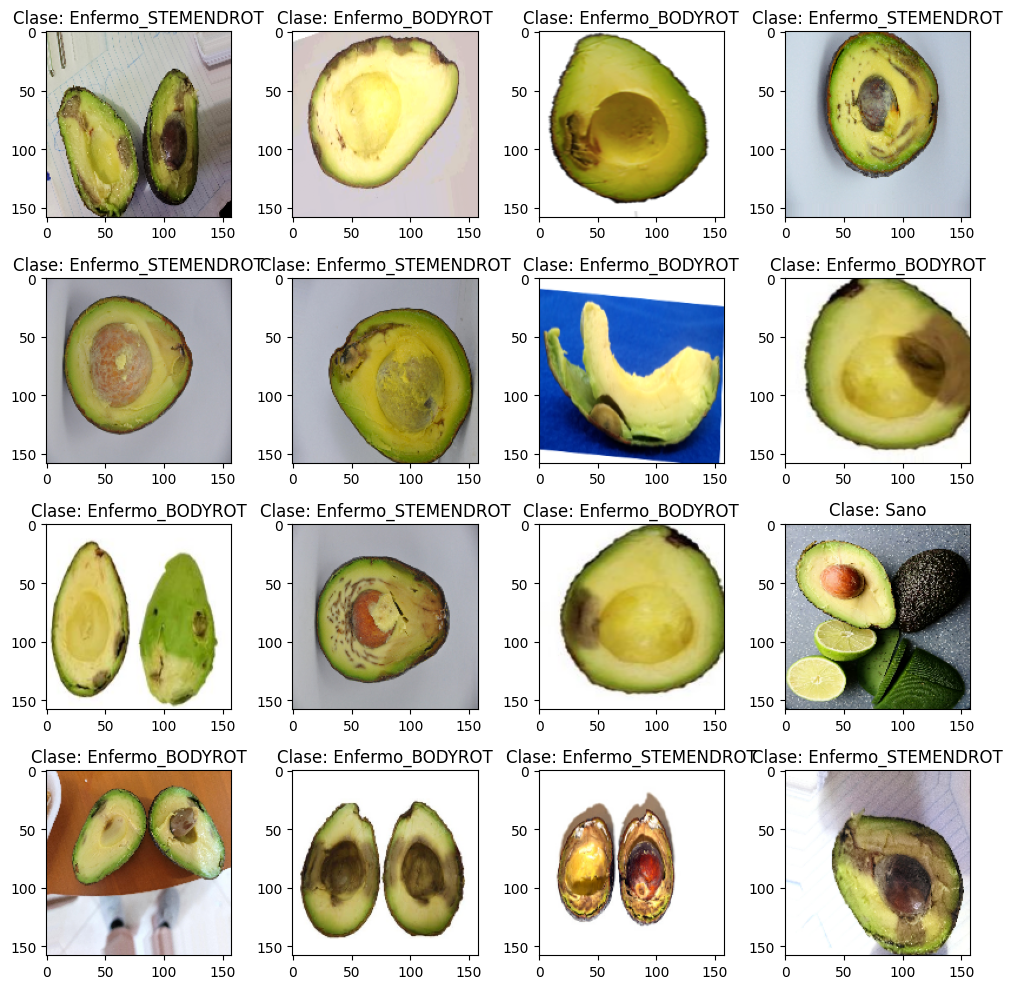

In [ ]:
#crea una cuadrícula de subgráficos
fig,ax=plt.subplots(4,4)
#Ajusta el tamaño de la figura
fig.set_size_inches(10,10)
for i in range(4):
    for j in range (4):
        #Selecciona un número aleatorio
        l=rn.randint(0,len(Etiquetas))
        ax[i,j].imshow(Imagenes[l])
        ax[i,j].set_title('Clase: '+clases[Etiquetas[l]])
plt.tight_layout()

In [ ]:
#instancia de LabelEncoder, una herramienta de la librería scikit-learn que convierte etiquetas categóricas en números enteros.
codificadorEtiquetas=LabelEncoder()
#Asigna un número entero único a cada clase en Etiquetas
claveEtiquetas=codificadorEtiquetas.fit_transform(Etiquetas)
#Convierte las etiquetas categóricas en vectores one-hot
claveEtiquetas=tf.keras.utils.to_categorical(claveEtiquetas,3)
print(claveEtiquetas)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [ ]:
#Dividir los datos en conjuntos de entrenamiento y prueba
#Divide los datos en dos subconjuntos: uno para entrenamiento y otro para prueba. 20% pruebas y 80% entrenamiento
img_entrenamiento,img_prueba,etq_entrenamiento,etq_prueba=train_test_split(Imagenes,Etiquetas,test_size=0.2,random_state=42)
#Convertir las imágenes a un arreglo numpy
img_entrenamiento=np.array(img_entrenamiento)
print(img_entrenamiento.shape)
img_prueba=np.array(img_prueba)
print(img_prueba.shape)
etq_entrenamiento= np.array(etq_entrenamiento)
etq_prueba = np.array(etq_prueba)

(705, 158, 158, 3)
(177, 158, 158, 3)


In [ ]:
# Cargar el modelo preentrenado ResNet50 sin la capa de clasificación superior
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Congelar las capas base del modelo
for layer in base_model.layers:
    layer.trainable = False

# Añadir capas personalizadas
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
predicciones = Dense(num_clases, activation='softmax')(x)

# Crear el modelo final
modelo = Model(inputs=base_model.input, outputs=predicciones)

# Compilar el modelo
modelo.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# Entrenar el modelo
historial = modelo.fit(img_entrenamiento, etq_entrenamiento,
                       validation_data=(img_prueba, etq_prueba),
                       epochs=10, batch_size=32)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 120s 5s/step - accuracy: 0.4158 - loss: 1.2900 - val_accuracy: 0.4972 - val_loss: 1.0708
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 145s 5s/step - accuracy: 0.5289 - loss: 0.9718 - val_accuracy: 0.5311 - val_loss: 0.9459
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 110s 5s/step - accuracy: 0.5721 - loss: 0.8765 - val_accuracy: 0.4407 - val_loss: 0.8881
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 141s 5s/step - accuracy: 0.5463 - loss: 0.8745 - val_accuracy: 0.5932 - val_loss: 0.8631
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 113s 5s/step - accuracy: 0.6470 - loss: 0.8034 - val_accuracy: 0.5424 - val_loss: 0.8479
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 109s 5s/step - accuracy: 0.5914 - loss: 0.9101 - val_accuracy: 0.3898 - val_loss: 0.9898
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 151s 5s/step - accuracy: 0.5364 - loss: 0.8646 - val_accuracy: 0.5706 - val_loss: 0.8097
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 113s 5s/step - accuracy: 0.6132 - loss: 0.8083 - val_accuracy: 0.7232 - v

In [ ]:
# Generar predicciones con el modelo
predicciones = modelo.predict(img_prueba)
predicciones_etq = np.argmax(predicciones, axis=1)

6/6 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step


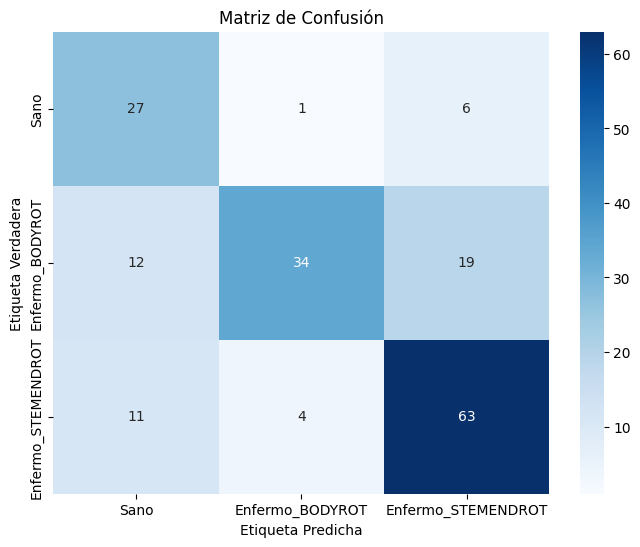

In [ ]:
# Generar matriz de confusión
matriz_confusion = confusion_matrix(etq_prueba, predicciones_etq)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=clases, yticklabels=clases)
plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()

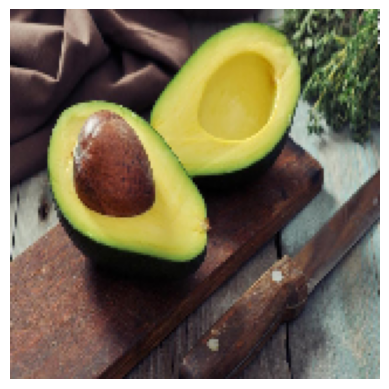

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
La imagen pertenece a la clase: Enfermo_STEMENDROT


In [ ]:
# Definir las clases que estás utilizando
clases = ['Sano', 'Enfermo_BODYROT', 'Enfermo_STEMENDROT']

# Función para predecir una imagen
def predecir_imagen(ruta_imagen, modelo, clases, img_tam=158):
    # Cargar la imagen
    img = tf.keras.preprocessing.image.load_img(ruta_imagen, target_size=(img_tam, img_tam))

    # Mostrar la imagen
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Convertir la imagen a un array
    img_array = tf.keras.preprocessing.image.img_to_array(img)

    # Redimensionar y normalizar la imagen
    img_array = np.expand_dims(img_array / 255.0, axis=0)  # Expandir la dimensión para que sea compatible con el modelo

    # Hacer la predicción
    prediccion = modelo.predict(img_array)

    # Obtener la clase predicha
    clase_predicha = np.argmax(prediccion, axis=1)[0]

    # Mostrar el resultado
    print(f"La imagen pertenece a la clase: {clases[clase_predicha]}")

# Ejemplo de uso
ruta_imagen = 'aguacateprueba.jpg'  # Cambiar a la ruta de tu imagen
predecir_imagen(ruta_imagen, modelo, clases)